Analysis of a single Halo to understand the satellites falling in.

In [1]:
import numpy as np
import scipy.stats
import h5py
import sys
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
sys.path.insert(0,"../")
import illustris_python as il
from scipy.interpolate import interp1d

In [2]:
from matplotlib import rcParams
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 11
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif']= ['Arial']
rcParams['figure.facecolor'] = 'w'

In [3]:
from astropy.cosmology import FlatLambdaCDM

dataredshift1=np.genfromtxt('data/redshift_TNG', dtype=[('snap','<i8'), ('redshift','<f8')])

def find_redshift(snap):
    if len(snap)==1:
        arg=np.where(dataredshift1['snap']==snap)[0]
        if len(arg)>0:
            return dataredshift1['redshift'][arg[0]]
    else:
        red=np.zeros_like(snap,dtype=float)
        for i in range(len(red)):
            arg=np.where(dataredshift1['snap']==snap[i])[0]
            if len(arg)>0:
                red[i]=dataredshift1['redshift'][arg[0]]
        return red
        
        
def redshift(scale):
    return 1.0/scale - 1.0

def find_scale(redshift):
    return 1.0/(redshift+1)

cosmo = FlatLambdaCDM(H0=67.74, Om0=0.3089)

def age(redshift):
    age1=cosmo.age(redshift)
    return 13.7 - age1.value

In [4]:
basePath = '/home/rdsouza/SIMS/TNG50/output/'

Steps for Loading data:

- Load data
- Load list of MW mass halos
- Load list of massive accretions

In [5]:
# Load data
fields = ['SubhaloMassType','SubhaloFlag','SubhaloParent','SubhaloGrNr','SubhaloPos','SubhaloVel',
          'SubhaloVelDisp','SubhaloVmax','SubhaloVmaxRad']
subhalos = il.groupcat.loadSubhalos(basePath, 99, fields=fields)

In [6]:
h0=0.6774
G0=4.3e-6     # in units of kpc Msun^-1 (km/s)^2
dm=subhalos['SubhaloMassType'][:,1]*1e10/h0
sm=subhalos['SubhaloMassType'][:,4]*1e10/h0
mask_sub=subhalos['SubhaloFlag'][:]
parent=subhalos['SubhaloParent'][:]
pos=subhalos['SubhaloPos'][:]/h0
vel=subhalos['SubhaloVel'][:]
radvmax=subhalos['SubhaloVmaxRad'][:]/h0
GrpNo=subhalos['SubhaloGrNr'][:]

In [7]:
# Load the Group Catalog with information about which subhalos are centrals
groups = il.groupcat.loadHalos(basePath,99,fields=['GroupFirstSub','Group_M_Crit200','Group_R_Crit200'])
GroupFirstSub=groups['GroupFirstSub']
group_dm200  =groups['Group_M_Crit200']*1e10/h0
group_R200   =groups['Group_R_Crit200']/h0

In [8]:
dm200=np.zeros_like(dm)
R200=np.zeros_like(dm)
for i in range(len(dm200)):
    dm200[i]=group_dm200[GrpNo[i]]
    R200[i]=group_R200[GrpNo[i]]

In [9]:
# Load MW-mass central halos
mask_MW=np.load('data/MWM31SubfindID.npy')
ll_MW  = len(dm[mask_MW])
MW_subhalo_ids=mask_MW

In [10]:
# Load all massive progenitors
store_all0=np.load('data/ans_TNG50.npy')

Choose a single MW halo with a single merger

In [11]:
# choose galaxies with only one merger
a,b=np.unique(store_all0['SubfindID'][:],return_counts=True)
mask=(b==1)
id_single=a[mask]
ll1=len(id_single)

In [12]:
for i in range(ll1):
    arg=np.where(store_all0['SubfindID']==id_single[i])[0]
    print(id_single[i],dm200[id_single[i]]/1e12,store_all0[arg]['mpeak'],
          age(find_redshift(store_all0[arg]['SnapArrival'])), store_all0[arg]['Merg'])

449659 1.519010316288 [1.69409302e+12] 2.377632107587445 [False]
454171 1.630477615104 [1.24320888e+12] 1.363620576101379 [False]
470345 2.426186760192 [1.3353934e+11] 10.861339801826718 [ True]
472548 2.396269576192 [6.24439722e+11] 6.878488456040896 [ True]
482155 2.169187598336 [2.16549949e+11] 6.702484501945726 [False]
484448 2.006827794432 [2.07749071e+11] 10.107017371949333 [ True]
486046 2.001863442432 [4.61819314e+11] 3.9761864918572236 [ True]
489206 1.932132483072 [2.70729986e+11] 11.161400675953615 [ True]
494011 1.563826454528 [2.94164627e+11] 8.584683663693601 [ True]
496186 1.92950239232 [1.78608587e+11] 9.662518448929156 [ True]
499704 1.34912933888 [3.67298052e+11] 5.768618100927731 [ True]
501208 1.673304342528 [1.11789457e+11] 8.884085630195209 [False]
503437 1.528523784192 [7.61068585e+10] 8.719730064726793 [False]
503987 1.825426898944 [2.2965597e+11] 2.5624384866892065 [False]
519311 1.394888015872 [3.16347777e+11] 8.884085630195209 [ True]
523548 1.440663732224 [3

In [15]:
subfindID0=472548
arg=np.where(store_all0['SubfindID']==subfindID0)[0]
progenitorID0=store_all0['SubhaloID'][arg[0]]

In [16]:
print('dm200,dm',dm200[subfindID0]/1e12, dm[subfindID0]/1e12)
print('R200,RadVmax',R200[subfindID0],radvmax[subfindID0])

dm200,dm 2.396269576192 2.148640096256
R200,RadVmax 282.16385 1.0881295


In [17]:
progenitorID0

10000000201958722

In [18]:
# Plot the path of the progenitor ID

fields_tree = ['SubhaloID','MainLeafProgenitorID', 'DescendantID','FirstSubhaloInFOFGroupID','FirstProgenitorID','SubhaloMassType','SubfindID','SnapNum','SubhaloPos', 'SubhaloVel', 'SubhaloGrNr', 'Group_M_Crit200']
tree1 = il.sublink.loadTree(basePath, 99, subfindID0, fields=fields_tree)

# get mpb of the MW profile
subhaloID0=tree1['SubhaloID'][0]
arg_mpb=np.where((tree1['SubhaloID'][:]>=subhaloID0) & (tree1['SubhaloID'][:]<=tree1['MainLeafProgenitorID'][0]))[0]   
subhaloid_mpb=tree1['SubhaloID'][arg_mpb]

subhaloid_mpb_snap=tree1['SnapNum'][arg_mpb]
subhaloid_mpb_pos =tree1['SubhaloPos'][arg_mpb]
subhaloid_mpb_vel =tree1['SubhaloVel'][arg_mpb]

# convert everything to the refernce frame of the mpb.
for i in range(len(subhaloid_mpb_snap)):
    mask_snap=(tree1['SnapNum']==subhaloid_mpb_snap[i])
    tree1['SubhaloPos'][mask_snap]=tree1['SubhaloPos'][mask_snap]-subhaloid_mpb_pos[i]
    tree1['SubhaloVel'][mask_snap]=tree1['SubhaloVel'][mask_snap]-subhaloid_mpb_vel[i]



# get the progenitorID
arg_ii=np.where(tree1['SubhaloID']==progenitorID0)[0][0]
arg_sub1=np.where(tree1['MainLeafProgenitorID']==tree1['MainLeafProgenitorID'][arg_ii])[0]
base_sub=np.min(arg_sub1)
arg_sub=np.where((tree1['SubhaloID'][:]>=tree1['SubhaloID'][base_sub]) & (tree1['SubhaloID'][:]<=tree1['MainLeafProgenitorID'][arg_ii]))[0]  
subhalosid_sub=tree1['SubhaloID'][arg_sub]

subhalosid_sub_pos = tree1['SubhaloPos'][arg_sub]
subhalosid_sub_snap = tree1['SnapNum'][arg_sub]
subhalosid_sub_scale=1/(1+find_redshift(subhalosid_sub_snap))
subhalosid_sub_age=age(find_redshift(subhalosid_sub_snap))
subhalosid_sub_dist=(np.sqrt(subhalosid_sub_pos[:,0]**2 + subhalosid_sub_pos[:,1]**2 + subhalosid_sub_pos[:,2]**2)*subhalosid_sub_scale/h0)

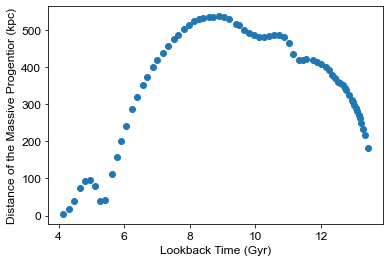

In [20]:
plt.xlabel('Lookback Time (Gyr)')
plt.ylabel('Distance of the Massive Progentior (kpc)')
plt.scatter(subhalosid_sub_age[:-1],subhalosid_sub_dist[:-1])

Find all the subhaloes that fell into the massive progenitor.

- Find all subhaloes that merged with the mpb.
- Find all subhaloes existing till z=0 and which were accreted.

In [21]:
store_all=np.zeros(400,dtype=[('SubhaloID','<i8'), ('mpeak', '<f8'), ('speak', '<f8'), ('SnapArrival','<i4'), ('Merg',bool)])


In [22]:
# all merged galaxies
count_all=0
subhaloid_mpb_firstsubhalo=tree1['FirstSubhaloInFOFGroupID'][arg_mpb]
mask_grp=np.in1d(tree1['FirstSubhaloInFOFGroupID'][:],subhaloid_mpb_firstsubhalo)
subhalosids_grp_in=tree1['SubhaloID'][mask_grp]
subhalosids_grp_out=tree1['SubhaloID'][~mask_grp]

# Find those that just fell in.
mask_just_fell_in= np.in1d(tree1['DescendantID'][~mask_grp],subhalosids_grp_in)
subhalosids_firstinfall=subhalosids_grp_out[mask_just_fell_in]
mask_first_infall=np.zeros_like(tree1['SubhaloID'][:],dtype=bool)
for j in range(len(subhalosids_firstinfall)):
    arg1=np.where(tree1['SubhaloID'][:]==subhalosids_firstinfall[j])[0]
    mask_first_infall[arg1]=True

# Apply a mass cut for the subhalos that fell in
mask_first_infall= mask_first_infall & ((tree1['SubhaloMassType'][:,1] * 1e10 / h0)>1e8)
arg1=np.where(mask_first_infall)[0]
# information about these subhalos which fell in
subhalosids_firstinfall=tree1['SubhaloID'][mask_first_infall]
snap_firstinfall=tree1['SnapNum'][mask_first_infall]
subhalosids_firstinfall_mpeak=np.zeros_like(subhalosids_firstinfall,dtype=float)
subhalosids_firstinfall_speak=np.zeros_like(subhalosids_firstinfall,dtype=float)
mask_subhalosids_firstinfall=np.ones_like(subhalosids_firstinfall,dtype=bool)
# create a mask - check for mass, but also check for previous entry.
# note that the mask considers everything True in the beginning
for j in range(len(arg1)):
    ii=arg1[j]
    arg_sub_mpb=np.where((tree1['SubhaloID'][:]>=tree1['SubhaloID'][ii]) & (tree1['SubhaloID'][:]<=tree1['MainLeafProgenitorID'][ii]))[0]  
    subhalosids_sub=tree1['SubhaloID'][arg_sub_mpb]
    subhalosids_firstinfall_mpeak[j] = np.max(tree1['SubhaloMassType'][arg_sub_mpb,1] * 1e10 / h0)
    #subhalosids_firstinfall_mpeak[j] = np.max(tree1['Group_M_Crit200'][arg_sub_mpb] * 1e10 / h0)
    subhalosids_firstinfall_speak[j] = np.max(tree1['SubhaloMassType'][arg_sub_mpb,4] * 1e10 / h0)
    if subhalosids_firstinfall_mpeak[j]<0.5e9:
        mask_subhalosids_firstinfall[j]=False
        
    mask_doublefall=np.in1d(subhalosids_firstinfall,subhalosids_sub)
    arg_check=np.where(subhalosids_firstinfall[mask_doublefall])[0]
    # one also finds oneself in the list.
    if len(arg_check)>1:
        arg_snap_check=np.where(snap_firstinfall[mask_doublefall]<  snap_firstinfall[j])[0]
        if len(arg_snap_check)>0: 
            mask_subhalosids_firstinfall[j]=False

subhalosids_firstinfall = subhalosids_firstinfall[mask_subhalosids_firstinfall]
subhalosids_firstinfall_mpeak=subhalosids_firstinfall_mpeak[mask_subhalosids_firstinfall]
subhalosids_firstinfall_speak=subhalosids_firstinfall_speak[mask_subhalosids_firstinfall]
snap_firstinfall=snap_firstinfall[mask_subhalosids_firstinfall]
for j in range(len(subhalosids_firstinfall_mpeak)):
    store_all['SubhaloID'][count_all]=subhalosids_firstinfall[j]
    store_all['mpeak'][count_all]=subhalosids_firstinfall_mpeak[j]
    store_all['speak'][count_all]=subhalosids_firstinfall_speak[j]
    store_all['SnapArrival'][count_all]=snap_firstinfall[j]
    store_all['Merg'][count_all]=True
    count_all=count_all+1

In [23]:
# Find present day subhalos linked to MWhalo

In [24]:
def distance(pos1):
    #return np.sqrt(np.sum(pos1[0,:]**2 + pos1[1,:]**2 + pos1[2,:]**2,axis=1))
    if len(pos1)==3:
        return np.sqrt(pos1[0]**2 + pos1[1]**2 + pos1[2]**2)
    else:
        return np.sqrt(pos1[:,0]**2 + pos1[:,1]**2 + pos1[:,2]**2)

In [25]:
fields_tree = ['SubhaloID','MainLeafProgenitorID', 'DescendantID','FirstSubhaloInFOFGroupID',
               'FirstProgenitorID','SubhaloMassType','SubfindID','SnapNum','SubhaloPos', 
               'SubhaloVel', 'SubhaloGrNr', 'Group_M_Crit200','Group_R_Crit200','Group_R_Crit500']

    
tree1 = il.sublink.loadTree(basePath, 99, subfindID0, fields=fields_tree, onlyMPB=True)
grpno_mpb=tree1['SubhaloGrNr'][:]
snapno_mpb=tree1['SnapNum'][:]
snapno_mpb_scale=1.0/(1+find_redshift(snapno_mpb))
firstsubhalo_mpb=tree1['FirstSubhaloInFOFGroupID'][:]
pos_mpb=tree1['SubhaloPos'][:]
R200_mpb=tree1['Group_R_Crit200'][:]/h0
R500_mpb=tree1['Group_R_Crit500'][:]/h0
ll_mpb=len(snapno_mpb)


# choose subhalos out to a certain radius
arg_distance=np.where((distance(pos-pos[subfindID0]) < 3000) & (dm>0.5e8))[0]
arg_distance_bool=np.zeros_like(arg_distance,dtype=bool)

for i,arg1 in enumerate(arg_distance):
    
    if arg1!=subfindID0:
        dist1 = distance(pos[arg1]-pos[subfindID0])
        tree2 = il.sublink.loadTree(basePath, 99, arg1, fields=fields_tree, onlyMPB=True)
        if tree2!=None and len(tree2)>2:
            snap_sub  = tree2['SnapNum'][:]
            snap_sub_scale=1.0/(1+find_redshift(snap_sub))
            pos_sub   = tree2['SubhaloPos'][:]
            mask_in1  = np.isin(snapno_mpb,snap_sub,assume_unique=True)
            mask_in2  = np.isin(snap_sub,snapno_mpb,assume_unique=True)
            dist_sub  = np.zeros_like(snap_sub[mask_in2],dtype=float)
            dist_sub  = distance(pos_sub[mask_in2] - pos_mpb[mask_in1])*snap_sub_scale[mask_in2]/h0
            mask_in3  = dist_sub<(R500_mpb[mask_in1]*snapno_mpb_scale[mask_in1])
            mpeak_sub = np.max(tree2['SubhaloMassType'][:,1] * 1e10 / h0)
            if (len(np.where(mask_in3)[0])>0) & (mpeak_sub>0.5e9):
                arg_distance_bool[i]=True
                speak_sub = np.max(tree2['SubhaloMassType'][:,4] * 1e10 / h0)
                store_all['SubhaloID'][count_all]=arg1
                store_all['mpeak'][count_all]=mpeak_sub
                store_all['speak'][count_all]=speak_sub
                store_all['SnapArrival'][count_all]=np.min(snap_sub[mask_in2][mask_in3])
                store_all['Merg'][count_all]=False
                count_all=count_all+1

arg_distance=arg_distance[arg_distance_bool]

In [37]:
mask=store_all['SubhaloID'][:]>0
store_all=store_all[mask]
#np.save('subhaloes_472548.npy',store_all)

Calculate the binding energy of the surviving subhaloes.
Make assumptions of the potential.

In [27]:
Mv  = 2.4e12
Rv  = 282.16
Conc= 8      # I made this up!!!
Vv  = np.sqrt(G0*Mv/Rv)

In [28]:
def potential(r):
    """
    This is a fiducial potential using an NFW profile
    r is in physical units
    """
    
    denom=((Rv/Conc)**3)*(np.log(1+ Conc) -  Conc/(1+Conc))
    Central=Mv/denom

    r0=50000
    pot10000=Central * G0 * ((Rv/Conc)**2) * np.log(1 + Conc*r0/Rv)/(Conc*r0/Rv) 

    return (Central * G0 * ((Rv/Conc)**2) * np.log(1 + Conc*r/Rv)/(Conc*r/Rv)) - pot10000

In [29]:
def circular_vel(r):
    """
    r is in physical units
    """
    
    Vv  = np.sqrt(G0*Mv/Rv)
    
    x=r/Rv
    return Vv*np.sqrt((1.0/x)*((np.log(1+Conc*x) - Conc*x/(1+Conc*x))/(np.log(1+Conc) - Conc/(1+Conc)) ))

In [30]:
def total_energy(r):
    vc=circular_vel(r)
    pe=potential(r)
    return pe-0.5*vc*vc

In [31]:
def find_per_apo(E,L2):
    rrange   = np.arange(1,10*Rv)
    rfind1   = np.zeros_like(rrange)
    for i in range(len(rrange)):
        r=rrange[i]
        pot = potential(r)
        rfind1[i]= 2*(pot-E)-L2/(r*r)
    r_edge=np.zeros(2)
    nfind1=np.sign(rfind1)
    nprev=nfind1[0]
    j=0
    for i in range(1,len(rrange)):
        if nfind1[i]!=nprev:
            r_edge[j]=i
            j=j+1
        nprev=nfind1[i]
    return r_edge[0],r_edge[1]
        

In [32]:
r_range=np.arange(1,10*Rv)
energy_range=total_energy(r_range)
energy_func=interp1d(energy_range,r_range)

In [33]:
mask=(store_all['Merg']==False) & (store_all['mpeak']>1e9)
S_age=age(find_redshift(store_all['SnapArrival'][mask]))
S_mass=store_all['mpeak'][mask]
arg_distance=store_all['SubhaloID'][mask]

In [34]:
# calculate the binding energy
bind_energy  = np.zeros(len(arg_distance),dtype=float)
distance1    = np.zeros(len(arg_distance),dtype=float)
ang_momentum2= np.zeros(len(arg_distance),dtype=float)
rapo_all     = np.zeros(len(arg_distance),dtype=float)
rper_all     = np.zeros(len(arg_distance),dtype=float)
circularity  = np.zeros(len(arg_distance),dtype=float)
collect_all  = np.zeros(len(arg_distance),dtype=float)
S_host       = np.zeros_like(arg_distance, dtype=bool)

for j,arg1 in enumerate(arg_distance):   
    dist1   = distance(pos[arg1]-pos[subfindID0])
    [x,y,z] = (pos[arg1]-pos[subfindID0])
    [vx,vy,vz] = vel[arg1]-vel[subfindID0]    
    vr  = (x*vx + y*vy + z*vz)/dist1
    vt  = np.sqrt(vx*vx + vy*vy + vz*vz - vr*vr)
    Lx=y*vz-z*vy
    Ly=z*vx-x*vz
    Lz=x*vy-y*vx
    
    if GrpNo[arg1]==GrpNo[subfindID0]:
        S_host[j]=True
    
    pot_energy    = potential(dist1)
    kin_energy    = 0.5*(vx**2 +vy**2 +vz**2)
    ang_moment2   = Lx*Lx + Ly*Ly + Lz*Lz
    bind_energy[j]= (pot_energy-kin_energy)
    distance1[j]=dist1
    
    if (bind_energy[j]>np.min(energy_range)) & (bind_energy[j]<np.max(energy_range)):
        radius=energy_func(bind_energy[j])
        angular_circular = radius*circular_vel(radius)
        circularity[j]   = vt*dist1/angular_circular
        rper,rapo        = find_per_apo(bind_energy[j],ang_moment2)
        rapo_all[j]      = rapo
        rper_all[j]      = rper
        collect_all[j]   = (distance1[j]-rper)/(rapo-rper)

    



Text(0, 0.5, '#')

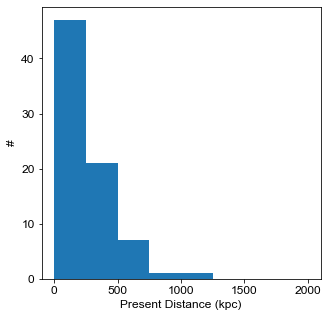

In [35]:
# Test to see the radial distribution of all subhaloes that fell into the galaxy.
plt.figure(figsize=(5,5))
plt.hist(distance1,bins=np.arange(0,2200,250))
plt.xlabel('Present Distance (kpc)')
plt.ylabel('#')

Text(0, 0.5, 'Lookback Time when they fell into the galaxy (Gyr)')

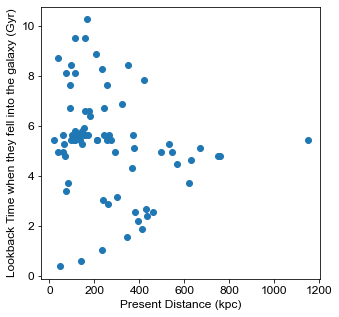

In [38]:
# Test to see the radial distribution of the subhaloes
plt.figure(figsize=(5,5))
plt.scatter(distance1,S_age)
plt.xlabel('Present Distance (kpc)')
plt.ylabel('Lookback Time when they fell into the galaxy (Gyr)')

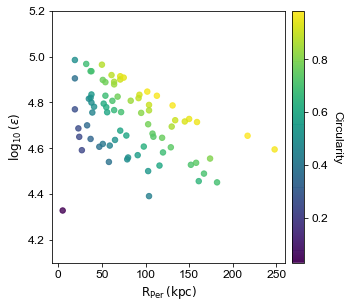

In [39]:
fig1=plt.figure(figsize=(5,5))
ax1 = fig1.add_axes([0.15, 0.15, 0.7, 0.7])
ax1.set_ylim([4.1,5.2])
sc1=ax1.scatter(rper_all, np.log10(bind_energy), c=circularity,alpha=0.8, s=30)

ax1.set_ylabel('$\log_{10}\,(\epsilon)$')
ax1.set_xlabel('$\mathrm{R_{Per}\, (kpc)}$')
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar1=fig1.colorbar(sc1, cax=cax, orientation='vertical')
cbar1.set_label('Circularity',  labelpad=15, rotation=270)

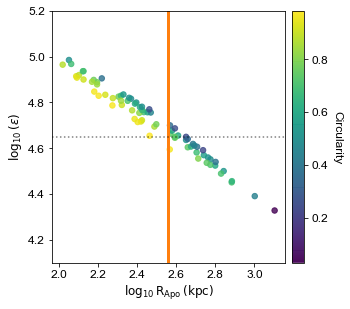

In [40]:
fig1=plt.figure(figsize=(5,5))
ax1 = fig1.add_axes([0.15, 0.15, 0.7, 0.7])
ax1.set_ylim([4.1,5.2])
sc1=ax1.scatter(np.log10(rapo_all), np.log10(bind_energy), c=circularity,alpha=0.8, s=30)
ax1.axvline(np.log10(359), ls='-', ymin=0, ymax=1, lw=3, color='C1', alpha=1.0)
ax1.axhline(4.65, ls=':', color='k', alpha=0.5)
ax1.set_ylabel('$\log_{10}\,(\epsilon)$')
ax1.set_xlabel('$\mathrm{\log_{10}\,R_{Apo}\, (kpc)}$')
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar1=fig1.colorbar(sc1, cax=cax, orientation='vertical')
cbar1.set_label('Circularity',  labelpad=15, rotation=270)

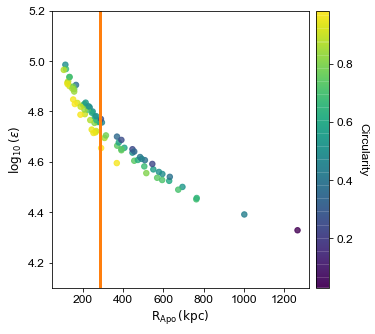

In [42]:
fig1=plt.figure(figsize=(5.5,5.5))
ax1 = fig1.add_axes([0.15, 0.15, 0.7, 0.7])
ax1.set_ylim([4.1,5.2])
#ax1.set_xticks([200,4.6,4.8,5.0])
sc1=ax1.scatter(rapo_all, np.log10(bind_energy), c=circularity,alpha=0.8, s=30)
ax1.axvline(Rv, ls='-', ymin=0, ymax=1, lw=3, color='C1', alpha=1.0)
ax1.set_ylabel('$\log_{10}\,(\epsilon)$')
ax1.set_xlabel('$\mathrm{R_{Apo}\, (kpc)}$')
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar1=fig1.colorbar(sc1, cax=cax, orientation='vertical')
cbar1.set_label('Circularity',  labelpad=15, rotation=270)


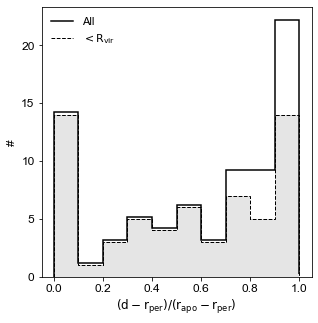

In [43]:
from matplotlib.lines import Line2D

fig1=plt.figure(figsize=(5,5))
ax1 = fig1.add_axes([0.15, 0.15, 0.75, 0.75])
ax1.hist(collect_all,bins=np.arange(0,1.01,0.1), color='k', bottom=0.2, histtype='step', ls='-', lw=1.5, alpha=1, label='All' )
ax1.hist(collect_all[S_host],bins=np.arange(0,1.01,0.1), color='k', histtype='step', ls='--', lw=1, alpha=1, label=r"$\mathrm{< R_{vir}}$")
ax1.hist(collect_all[S_host],bins=np.arange(0,1.01,0.1), color='k', alpha=0.1)
ax1.set_ylabel('#')
ax1.set_xlabel('$\mathrm{(d-r_{per})/(r_{apo} - r_{per})}$')

# Create new legend handles but use the colors from the existing ones
handles, labels = ax1.get_legend_handles_labels()
new_handles = [Line2D([], [], c='k', ls=h.get_linestyle(), lw=h.get_linewidth()) for h in handles]
leg1=plt.legend(handles=new_handles, labels=labels, loc=2)
leg1.get_frame().set_linewidth(0.0)



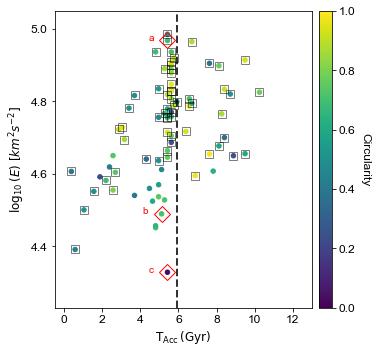

In [44]:
fig1=plt.figure(figsize=(5.5,5.5))
ax1 = fig1.add_axes([0.15, 0.15, 0.7, 0.75])
ax1.set_ylim([4.23,5.05])
ax1.axvline(x=5.9, color='k', lw=2, linestyle='--',alpha=0.8)
sc1=ax1.scatter(S_age, np.log10(bind_energy), c=circularity, vmin=0, vmax=1,alpha=1, s=20)
ax1.plot(S_age[S_host], np.log10(bind_energy[S_host]), 'ks', markersize=8, markerfacecolor='none', alpha=0.5)
ax1.set_ylabel('$\log_{10}\,(E)\,\, [km^{2} s^{-2}]$')
ax1.set_ylabel('$\log_{10}\,(E)\,\, [km^{2} s^{-2}]$')
ax1.set_xlabel('$\mathrm{T_{Acc}\,(Gyr)}$')
ax1.set_xlim([-0.5,13])
ax1.set_xticks([0,2,4,6,8,10,12])
ax1.set_yticks([4.4,4.6,4.8,5.0])


indx_sp=np.array([2,72,74])
labe_sp=['a','b','c']
ax1.plot(S_age[indx_sp], np.log10(bind_energy[indx_sp]), 'rD', markersize=12, markerfacecolor='none', alpha=1.0)
for ind,lab in zip(indx_sp,labe_sp):
        ax1.text(S_age[ind]-1.0,np.log10(bind_energy[ind]),lab, color='r')


divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar1=fig1.colorbar(sc1, cax=cax, orientation='vertical')
cbar1.set_label('Circularity',  labelpad=15, rotation=270)


Text(0.3, 1150, 'c')

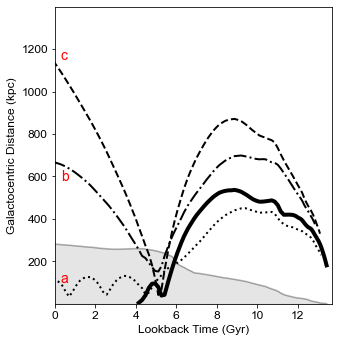

In [45]:
# Paths of three subhaloes which fell in with the massive progentior

fig1=plt.figure(figsize=(5.5,5.5))
ax1 = fig1.add_axes([0.15, 0.15, 0.7, 0.75])


fields_tree = ['SubhaloID','MainLeafProgenitorID', 'DescendantID',
               'FirstSubhaloInFOFGroupID','FirstProgenitorID','SubhaloMassType',
               'SubfindID','SnapNum','SubhaloPos', 'SubhaloVel', 'SubhaloGrNr', 
               'Group_M_Crit200','Group_R_Crit200','Group_R_Crit500']


tree2 = il.sublink.loadTree(basePath, 99, subfindID0, fields=fields_tree, onlyMPB=True)
subhaloid_mpb_snap=tree2['SnapNum']
subhaloid_mpb_pos =tree2['SubhaloPos']
subhaloid_mpb_vel =tree2['SubhaloVel']
subhaloid_mpb_R200 = tree2['Group_R_Crit200']/h0

red0=find_redshift(subhaloid_mpb_snap)
subhaloid_mpb_age=age(red0)
subhaloid_mpb_scale=1.0/(1+red0)
ax1.plot(subhaloid_mpb_age,subhaloid_mpb_R200*subhaloid_mpb_scale, 'k', alpha=0.3)
ax1.fill_between(subhaloid_mpb_age,subhaloid_mpb_R200*subhaloid_mpb_scale,
                 np.zeros_like(subhaloid_mpb_R200), color='k', alpha=0.1)

indx_sp=np.array([2,72,74])
marker_sp=[':','-.','--']
color_sp=['C0','C1','C2']
for i,arg1 in enumerate(arg_distance[indx_sp]):
    tree2 = il.sublink.loadTree(basePath, 99, arg1, fields=fields_tree, onlyMPB=True)
    subhaloid_sub1_snap=tree2['SnapNum']
    subhaloid_sub1_pos =tree2['SubhaloPos']
    subhaloid_sub1_vel =tree2['SubhaloVel']
    red1=find_redshift(subhaloid_sub1_snap)
    subhaloid_sub1_age=age(red1)
    subhaloid_sub1_scale=1.0/(1+red1)
    subhaloid_sub1_dist=np.zeros_like(subhaloid_sub1_age, dtype=float)
    subhaloid_sub1_bool=np.zeros_like(subhaloid_sub1_age, dtype=bool)
    for j,arg2 in enumerate(subhaloid_sub1_snap):
        arg3=np.where(subhaloid_mpb_snap==arg2)[0]
        if len(arg3)>0:
            subhaloid_sub1_bool[j]=True
            subhaloid_sub1_dist[j]=distance(subhaloid_sub1_pos[j]-subhaloid_mpb_pos[arg3[0]])*subhaloid_sub1_scale[j]/h0

    ax1.plot(subhaloid_sub1_age[subhaloid_sub1_bool][:-5],
             subhaloid_sub1_dist[subhaloid_sub1_bool][:-5],
             marker_sp[i],color='k',lw=2)
    
    
ax1.plot(subhalosid_sub_age[:-1],subhalosid_sub_dist[:-1],'k-',lw=4)



ax1.set_xlabel('Lookback Time (Gyr)')
ax1.set_ylabel('Galactocentric Distance (kpc)')
ax1.set_xlim([0,13.7])
ax1.set_ylim([0.1,1399])
ax1.text(0.3,100,'a', color='r', fontsize=14)
ax1.text(0.3,580,'b', color='r', fontsize=14)
ax1.text(0.3,1150,'c', color='r', fontsize=14)

(0.1, 1250.0)

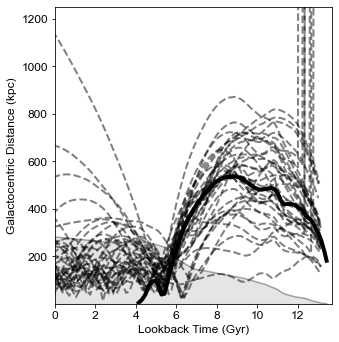

In [46]:
# Paths of all subhaloes that fell into the galaxy

fig1=plt.figure(figsize=(5.5,5.5))
ax1 = fig1.add_axes([0.15, 0.15, 0.7, 0.75])


fields_tree = ['SubhaloID','MainLeafProgenitorID', 'DescendantID',
               'FirstSubhaloInFOFGroupID','FirstProgenitorID','SubhaloMassType',
               'SubfindID','SnapNum','SubhaloPos', 'SubhaloVel', 'SubhaloGrNr', 
               'Group_M_Crit200','Group_R_Crit200']


tree2 = il.sublink.loadTree(basePath, 99, subfindID0, fields=fields_tree, onlyMPB=True)
subhaloid_mpb_snap=tree2['SnapNum']
subhaloid_mpb_pos =tree2['SubhaloPos']
subhaloid_mpb_vel =tree2['SubhaloVel']
subhaloid_mpb_R200 = tree2['Group_R_Crit200']/h0

red0=find_redshift(subhaloid_mpb_snap)
subhaloid_mpb_age=age(red0)
subhaloid_mpb_scale=1.0/(1+red0)
ax1.plot(subhaloid_mpb_age,subhaloid_mpb_R200*subhaloid_mpb_scale, 'k', alpha=0.3)
ax1.fill_between(subhaloid_mpb_age,subhaloid_mpb_R200*subhaloid_mpb_scale,
                 np.zeros_like(subhaloid_mpb_R200), color='k', alpha=0.1)

indx_sp=np.where((S_age>5) & (S_age<7))[0]
for i,arg1 in enumerate(arg_distance[indx_sp]):
    tree2 = il.sublink.loadTree(basePath, 99, arg1, fields=fields_tree, onlyMPB=True)
    subhaloid_sub1_snap=tree2['SnapNum']
    subhaloid_sub1_pos =tree2['SubhaloPos']
    subhaloid_sub1_vel =tree2['SubhaloVel']
    red1=find_redshift(subhaloid_sub1_snap)
    subhaloid_sub1_age=age(red1)
    subhaloid_sub1_scale=1.0/(1+red1)
    subhaloid_sub1_dist=np.zeros_like(subhaloid_sub1_age, dtype=float)
    subhaloid_sub1_bool=np.zeros_like(subhaloid_sub1_age, dtype=bool)
    for j,arg2 in enumerate(subhaloid_sub1_snap):
        arg3=np.where(subhaloid_mpb_snap==arg2)[0]
        if len(arg3)>0:
            subhaloid_sub1_bool[j]=True
            subhaloid_sub1_dist[j]=distance(subhaloid_sub1_pos[j]-subhaloid_mpb_pos[arg3[0]])*subhaloid_sub1_scale[j]/h0

    ax1.plot(subhaloid_sub1_age[subhaloid_sub1_bool][:-5],
             subhaloid_sub1_dist[subhaloid_sub1_bool][:-5],
             '--',color='k',alpha=0.5,lw=2)
    
    
ax1.plot(subhalosid_sub_age[:-1],subhalosid_sub_dist[:-1],'k-',lw=4)



ax1.set_xlabel('Lookback Time (Gyr)')
ax1.set_ylabel('Galactocentric Distance (kpc)')
ax1.set_xlim([0,13.7])
ax1.set_ylim([0.1,1250])
